In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Makine Öğrenmesi/Proje')
!pwd

Mounted at /content/drive
/content/drive/My Drive/Makine Öğrenmesi/Proje


In [2]:
import pandas as pd # Pandas Dosya Okuması İçin.

import matplotlib.pyplot as plt # Grafik İçin.
import numpy as np # Algoritma Başarısı Ölçümü İçin - Matematiksel İşlemler.


from sklearn.model_selection import train_test_split as tts # Verileri Test ve Eğitim verisi olarak ayırma.

from sklearn.neural_network import MLPRegressor # Yapay sinir ağı modeli.
from sklearn.svm import SVR # Destek vektör makinesi modeli.
from sklearn.metrics import r2_score # SVR & MLP başarı ölçümü kütüphanesi.

from sklearn.linear_model import LinearRegression # Doğrusal Regresyon lib.
from sklearn.preprocessing import PolynomialFeatures # Polinom Regresyon lib.

from sklearn.cluster import KMeans # Kümeleme algoritması için.

df = pd.read_csv('dataset(2).csv')
df.head()

,Year,Urban_Population,Urban_Population_Percent,Urban_Population_Growth,Population_Total,Population_Growth,Agriculture_Forestry_Fishing,Life_expectancy_at_birth_female_years,Life_expectancy_at_birth_male_years,Fixed_telephone_subscriptions,Inflation_consumer_prices_annual
0,2020,64186247,76.105,1.710287,84339067,1.084194,6.680560,80.769,74.984,12448604,12.278957
1,2019,63097812,75.630,1.960520,83429607,1.314514,6.400775,80.563,74.724,11532903,15.176822
2,2018,61872814,75.143,2.163514,82340090,1.497232,5.776012,80.336,74.447,11633461,16.332464
3,2017,60548564,74.644,2.286900,81116451,1.601312,6.038630,80.088,74.149,11308444,11.144311
4,2016,59179592,74.134,2.347923,79827868,1.639942,6.142292,79.816,73.826,11077559,7.775134


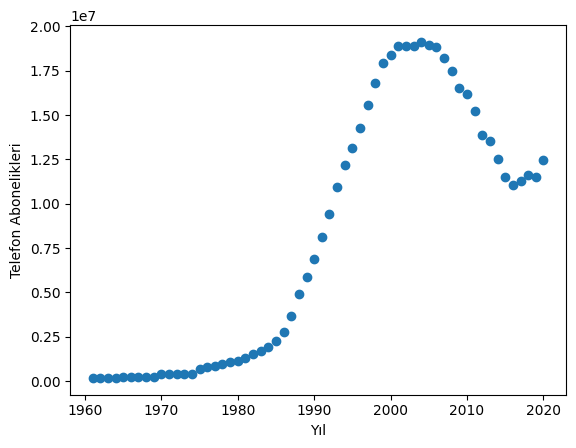

16313012


In [3]:
plt.scatter(df.Year, df.Fixed_telephone_subscriptions)
plt.xlabel('Yıl')
plt.ylabel('Telefon Abonelikleri')
plt.show()

# Grafik doğrusal olmadığı için bu grafiğe en uygun yöntemin Polinom Regresyonu olduğu düşünüldü.

# x & y ; Yıllara, toplam nüfusa, kentsel nüfusa göre aylık telefon aboneliğinin tahmini.
x = df[['Year', 'Urban_Population', 'Population_Total']]
y = df['Fixed_telephone_subscriptions'];

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

# Hibrit yöntem uygulanmış.

poly_reg = PolynomialFeatures(degree = 2) # 2. dereceden polinom regresyonu

x_poly = poly_reg.fit_transform(x_train)

lin_reg = LinearRegression()

lin_reg.fit(x_poly, y_train)
y_pred = lin_reg.predict(poly_reg.transform(x_test))

# Test için ayrılan 12 verinin değeri.
# print(y_pred)

# El ile tahmin etmek.
new_data = pd.DataFrame({'Year': [2021], 'Urban_Population': [66186247], 'Population_Total': [86339067]})
x_new = poly_reg.transform(new_data)
y_pred_new = lin_reg.predict(x_new)
print(int(y_pred_new))

Burada grafik polinom olduğu için, polinom regresyon uygulandı.

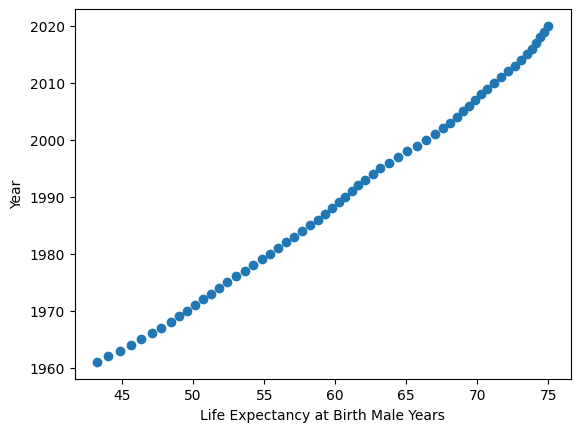

[[77.15636723]]


In [4]:
plt.scatter(df.Life_expectancy_at_birth_male_years, df.Year)
plt.xlabel('Life Expectancy at Birth Male Years')
plt.ylabel('Year')
plt.show()

linear_reg = LinearRegression()
y = df.Life_expectancy_at_birth_male_years.values.reshape(-1,1) # Bağımlı Değişken
x = df.Year.values.reshape(-1,1) # Bağımsız Değişken

linear_reg.fit(x,y) # Öğrenme

tahmin = linear_reg.predict([[2021]]) # 1 Yıl sonrasının tahmini.
print(tahmin) # 1 çıkarma sebebi hep 1 ya da 2 fazla tahmin etmesi.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


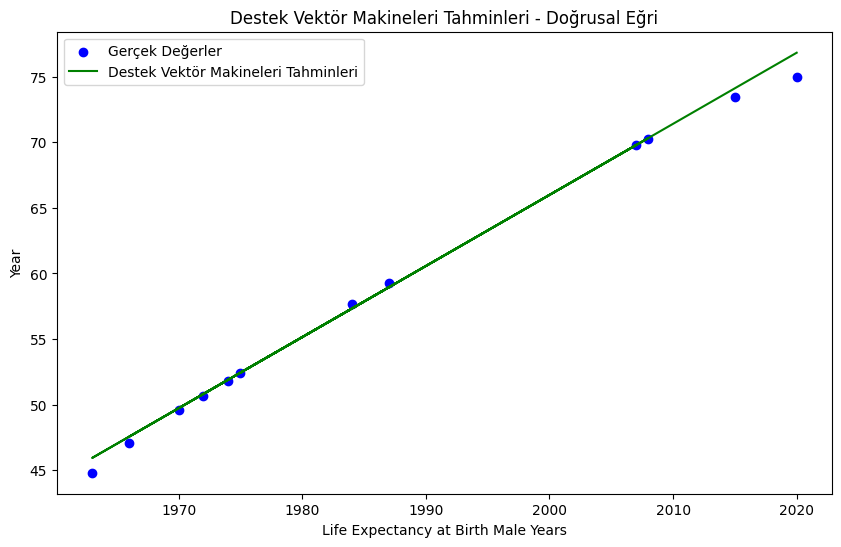

Destek Vektör Makineleri Başarı Oranı (R2 Score): 0.9956806480604251


In [7]:
X_train, X_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 42)

# Destek Vektör Makineleri Modeli
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_r2_score = r2_score(y_test, svm_predictions)

# Destek Vektör Makineleri tahminlerini doğrusal bir eğri grafikte görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Gerçek Değerler')
plt.plot(X_test, svm_predictions, color='green', label='Destek Vektör Makineleri Tahminleri')
plt.xlabel('Life Expectancy at Birth Male Years')
plt.ylabel('Year')
plt.title('Destek Vektör Makineleri Tahminleri - Doğrusal Eğri')
plt.legend()
plt.show()

# Destek Vektör Makineleri başarı oranı
print("Destek Vektör Makineleri Başarı Oranı (R2 Score):", svm_r2_score)

In [8]:
# 2023 yılı için tahmin yapma
x_2021 = np.array([[2021]]) # Giriş verisini hazırlama
# y_mlp_2023 = mlp_model.predict(x_2023)  # Yapay sinir ağı modeliyle tahmin yapma
y_svm_2021 = svm_model.predict(x_2021)  # Destek vektör makineleri modeliyle tahmin yapma

# print("Yapay Sinir Ağı Tahmini (2023):", y_mlp_2023)
print("Destek Vektör Makineleri Ortalama Erkek Yaşam Süresi Tahmini (2021):", y_svm_2021)

Destek Vektör Makineleri Ortalama Erkek Yaşam Süresi Tahmini (2021): [77.36666667]


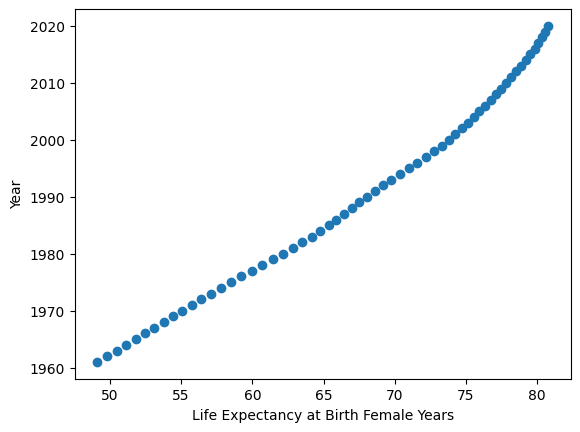

[[84.19868644]]


In [9]:
plt.scatter(df.Life_expectancy_at_birth_female_years, df.Year)
plt.xlabel('Life Expectancy at Birth Female Years')
plt.ylabel('Year')
plt.show()

linear_reg = LinearRegression()
y = df.Life_expectancy_at_birth_female_years.values.reshape(-1,1) # Bağımlı Değişken x = df.Year.values.reshape(-1,1) # Bağımsız Değişken

linear_reg.fit(x,y) # Öğrenme

tahmin = linear_reg.predict([[2021]]) # 1 Yıl sonrasının tahmini. print(tahmin) # 1 çıkarma sebebi hep 1 ya da 2 fazla tahmin etmesi.
print(tahmin)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


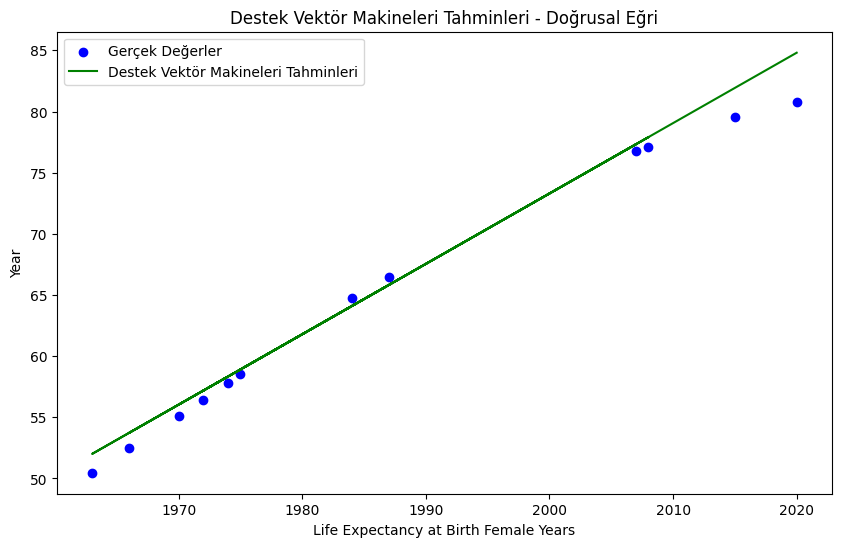

Destek Vektör Makineleri Başarı Oranı (R2 Score): 0.9783177399427295


In [10]:
X_train, X_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 42)

# Destek Vektör Makineleri Modeli
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_r2_score = r2_score(y_test, svm_predictions)

# Destek Vektör Makineleri tahminlerini doğrusal bir eğri grafikte görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Gerçek Değerler')
plt.plot(X_test, svm_predictions, color='green', label='Destek Vektör Makineleri Tahminleri')
plt.xlabel('Life Expectancy at Birth Female Years')
plt.ylabel('Year')
plt.title('Destek Vektör Makineleri Tahminleri - Doğrusal Eğri')
plt.legend()
plt.show()

# Destek Vektör Makineleri başarı oranı
print("Destek Vektör Makineleri Başarı Oranı (R2 Score):", svm_r2_score)

In [11]:
 # 2023 yılı için tahmin yapma
x_2023 = np.array([[2021]]) # Giriş verisini hazırlama
 # y_mlp_2023 = mlp_model.predict(x_2023)  # Yapay sinir ağı modeliyle tahmin yapma
y_svm_2023 = svm_model.predict(x_2023) # Destek vektör makineleri modeliyle tahmin yapma
 
 # print("Yapay Sinir Ağı Tahmini (2023):", y_mlp_2023)
print("Destek Vektör Makineleri Ortalama Kadın Yaşam Süresi Tahmini (2021):", y_svm_2023)

Destek Vektör Makineleri Ortalama Kadın Yaşam Süresi Tahmini (2021): [85.38461538]


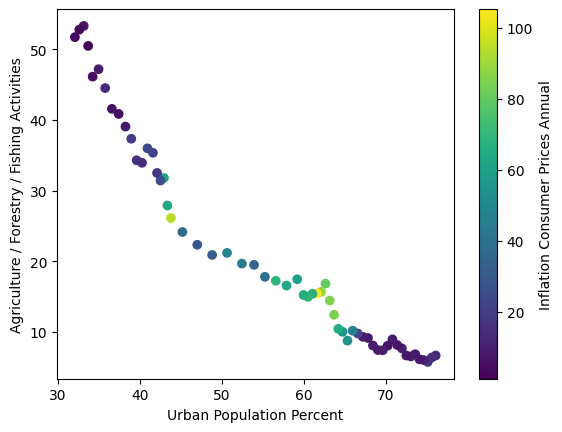

In [12]:
plt.scatter(df.Urban_Population_Percent, df.Agriculture_Forestry_Fishing, c = df.Inflation_consumer_prices_annual)
plt.xlabel('Urban Population Percent')
plt.ylabel('Agriculture / Forestry / Fishing Activities')
plt.colorbar(label='Inflation Consumer Prices Annual')  # Renk skalası
plt.show()

# Bağımsız
a = df[['Urban_Population_Percent', 'Agriculture_Forestry_Fishing']]

# Bağımlı
b = df['Inflation_consumer_prices_annual']

# Test ve Eğitim verilerine ayırma.
a_train, a_test, b_train, b_test = tts(a, b, test_size = 0.2, random_state = 42)

# Kent Nüfusu değişiminin ve Ormancılık ve Tarım faaliyetlerinin; enflasyona olan etkisinin KEN Yakın Komşu sınıflandırması.

In [13]:
# Destek Vektör Makineleri Modeli
svm_model = SVR(kernel='linear')
svm_model.fit(a_train, b_train)
svm_predictions = svm_model.predict(a_test)
svm_r2_score = r2_score(b_test, svm_predictions)


# Destek Vektör Makineleri başarı oranı
print("Destek Vektör Makineleri Başarı Oranı (R2 Score):", svm_r2_score)

Destek Vektör Makineleri Başarı Oranı (R2 Score): 0.30405828938267165


Destek Vektör Makinelerinden istenilen sonuç elde edilemedi, başarı oranı : %30.